In [65]:
import numpy as np
import pandas as pd
# data_type = {'let_tr':np.str, 'x_box':np.int16,'y_box':np.int16,'width':np.int16,'high':np.int16,'on_pix':np.int16,'x_bar':np.int16,'y_bar':np.int16,'x2_bar':np.int16,'y2_bar':np.int16,'xy_bar':np.int16,'x2y_bar':np.int16,'xy2_bar':np.int16,'x_ege':np.int16,'xeg_vy':np.int16,'y_ege':np.int16,'yeg_vx':np.int16}

data = pd.read_csv("raw_data.csv")

In [66]:
#Split into different pairs
df_pair1 = data.query('let_tr == "K" | let_tr == "H"')
df_pair1 = df_pair1.reset_index(drop = True)
df_pair2 = data.query('let_tr =="M" | let_tr == "Y"')
df_pair2 = df_pair2.reset_index(drop = True)
df_pair3 = data.query('let_tr =="I" | let_tr == "L"')
df_pair3 = df_pair3.reset_index(drop = True)

In [67]:
column = df_pair1.columns.tolist()
column.remove('let_tr')

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def split_norm(df):
    y = df['let_tr'].values
    df1 = df.drop(['let_tr'], axis =1)
    x = df1.values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
    tool = MinMaxScaler(feature_range=(0,1))
    x_train = tool.fit_transform(x_train)
    x_test = tool.fit_transform(x_test)
    return x_train, x_test, y_train, y_test


Split the dataset then do the 0-1 normalization

In [69]:
x_train1, x_val1, y_train1, y_val1 = split_norm(df_pair1)

In [70]:
x_train2, x_val2, y_train2, y_val2 = split_norm(df_pair2)

In [71]:
x_train3, x_val3, y_train3, y_val3 = split_norm(df_pair3)

Feature reduction
Method1: PCA (use pair1 to train)

In [46]:
from sklearn.decomposition import PCA
#Train data
pca_train = PCA(n_components=4)
pca_train.fit(x_train3)
x_train3 = pca_train.fit_transform(x_train3)
#Test data
pca_val = PCA(n_components=4)
pca_val.fit(x_val3)
x_val3 = pca_val.fit_transform(x_val3)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Use the data of pair1 after PCA to train the 3 models
Model 1: KNN

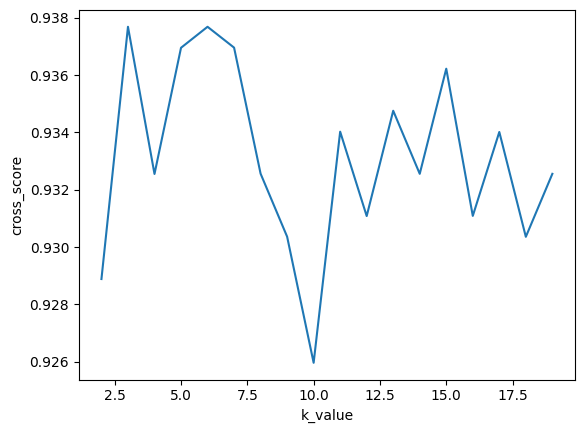

The best value of k is:  3
Running time is:  0:00:01.983537


In [47]:
import datetime
start = datetime.datetime.now()
score1 = []
k_values = []
for k in range(2,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    cross_score = cross_val_score(knn, x_train3,y_train3,cv = 5).mean()
    score1.append(cross_score)
    k_values.append(k)

k_array = np.array(k_values)
score1_array = np.array(score1)
plt.plot(k_array, score1_array)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()
max_index = score1_array.argmax()
max_k = k_values[max_index]
print('The best value of k is: ', max_k)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [82]:
from sklearn.metrics import accuracy_score
knn_clf = KNeighborsClassifier(n_neighbors=max_k)
knn_clf.fit(x_val2,y_val2)
y_predict = knn_clf.predict(x_val2)
print(accuracy_score(y_val2,y_predict))

0.9873417721518988


Model 2: Decision Tree

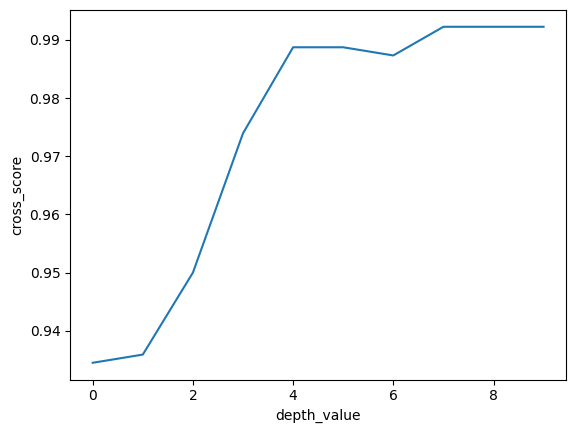

The best value of depth is:  7
Running time is:  0:00:00.427994


In [72]:
from sklearn.tree import DecisionTreeClassifier
start = datetime.datetime.now()
score2 = []
d_values = []
max_depth = 10
for d in range(max_depth):
    dt = DecisionTreeClassifier(criterion="entropy",max_depth =d+1, random_state = 30, splitter = "random")
    cross_score2 = cross_val_score(dt, x_train2,y_train2,cv = 5).mean()
    score2.append(cross_score2)
    d_values.append(d)

d_array = np.array(d_values)
score2_array = np.array(score2)
plt.plot(d_array, score2_array)
plt.xlabel('depth_value')
plt.ylabel('cross_score')
plt.show()
max_index2 = score2_array.argmax()
max_d = d_values[max_index2]
print('The best value of depth is: ', max_d)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [73]:
dt_clf = DecisionTreeClassifier(criterion="entropy",max_depth =max_d, random_state = 30, splitter = "random")
dt_clf.fit(x_val3,y_val3)
y_predict = dt_clf.predict(x_val3)
print(accuracy_score(y_val3,y_predict))

1.0


Model 3: ANN

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

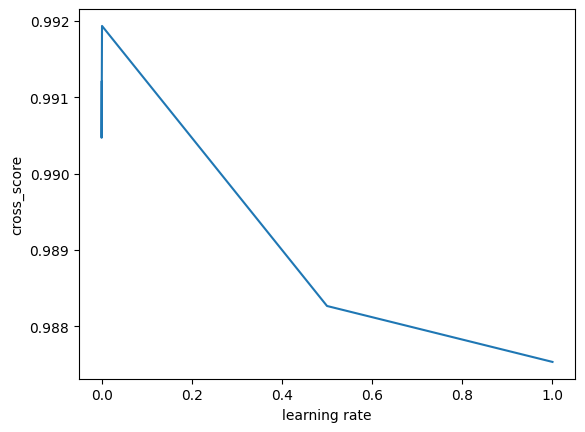

The best learning rate is:  0.001
Running time is:  0:01:10.850172


In [76]:
from sklearn.neural_network import MLPClassifier
start = datetime.datetime.now()
score5 = []
#hidden_layer number ;
# can also tune the number of neurons on each layer
# the activation function
# the learning rate
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5 = cross_val_score(clf, x_train3,y_train3,cv = 5).mean()
    score5.append(cross_score5)

lr_array = np.array(lr_list)
score5_array = np.array(score5)
plt.plot(lr_array, score5_array)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5 = score5_array.argmax()
best_lr = lr_list[max_index5]
print('The best learning rate is: ', best_lr)
end = datetime.datetime.now()
print('Running time is: ',end-start)

In [80]:
ann_clf = MLPClassifier(solver='adam', alpha = best_lr,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_val2,y_val2)
y_predict = ann_clf.predict(x_val2)
print(accuracy_score(y_val2,y_predict))

0.4810126582278481


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Method 2:  Embedded method
 Tree based (use pair2 to train)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf_train = ExtraTreesClassifier()
clf_test = ExtraTreesClassifier()
clf_train = clf_train.fit(x_train3, y_train3)
clf_test = clf_test.fit(x_val3,y_val3)
# clf_train.feature_importances_
# clf_test.feature_importances_

In [ ]:
# Train
model = SelectFromModel(clf_train, prefit=True,max_features=4)
x_train3 = model.transform(x_train3)
# Test
model_test  = SelectFromModel(clf_test, prefit=True,max_features=4)
x_val3 = model_test.transform(x_val3)

Use the data of pair2 after Embedded to train the 3
 models
Model 1: KNN

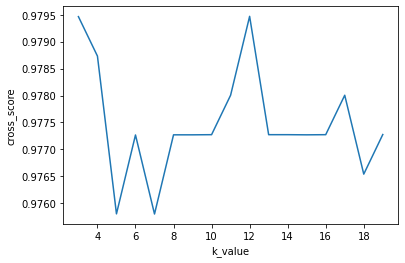

The best value of k is:  12
Running time is:  0:00:01.437161


In [ ]:
start = datetime.datetime.now()
score1_pair2 = []
k_values_pair2 = []
for k in range(3,20):
    knn_pair2 = KNeighborsClassifier(n_neighbors= k)
    cross_score_pair2 = cross_val_score(knn_pair2, x_train3,y_train3,cv = 5).mean()
    score1_pair2.append(cross_score_pair2)
    k_values_pair2.append(k)

k_array_pair2 = np.array(k_values_pair2)
score1_array_pair2 = np.array(score1_pair2)
plt.plot(k_array_pair2, score1_array_pair2)
plt.xlabel('k_value')
plt.ylabel('cross_score')
plt.show()
max_index_pair2 = score1_array_pair2.argmax()
max_k_pair2 = k_values_pair2[max_index_pair2]
print('The best value of k is: ', max_k_pair2)
end = datetime.datetime.now()
print("Running time is: ",end-start)

In [ ]:
start = datetime.datetime.now()
knn_clf = KNeighborsClassifier(n_neighbors=max_k_pair2)
knn_clf.fit(x_val3,y_val3)
y_predict = knn_clf.predict(x_val3)
print(accuracy_score(y_val3,y_predict))
end = datetime.datetime.now()
print("Running time is: ",end-start)

0.881578947368421
Running time is:  0:00:00.015641


Model 2: Decision Tree

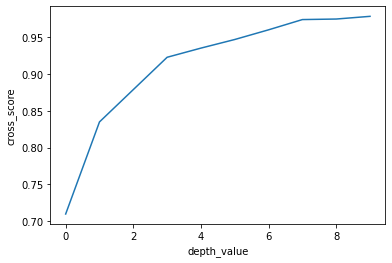

The best value of depth is:  9
Running time is:  0:00:00.249941


In [ ]:
start = datetime.datetime.now()
score2_pair2 = []
d_values_pair2 = []
max_depth_pair2 = 10
for d in range(max_depth_pair2):
    dt_pair2 = DecisionTreeClassifier(criterion="entropy",max_depth =d+1, random_state = 30, splitter = "random")
    cross_score2_pair2 = cross_val_score(dt_pair2, x_train3,y_train3,cv = 5).mean()
    score2_pair2.append(cross_score2_pair2)
    d_values_pair2.append(d)

d_array_pair2 = np.array(d_values_pair2)
score2_array_pair2 = np.array(score2_pair2)
plt.plot(d_array_pair2, score2_array_pair2)
plt.xlabel('depth_value')
plt.ylabel('cross_score')
plt.show()
max_index2_pair2 = score2_array_pair2.argmax()
max_d_pair2 = d_values_pair2[max_index2_pair2]
print('The best value of depth is: ', max_d_pair2)
end = datetime.datetime.now()
print("Running time is: ",end-start)

In [ ]:
start = datetime.datetime.now()
dt_clf = DecisionTreeClassifier(criterion="entropy",max_depth =max_d_pair2 +1, random_state = 30, splitter = "random")
dt_clf.fit(x_val3,y_val3)
y_predict = dt_clf.predict(x_val3)
print(accuracy_score(y_val3,y_predict))
end = datetime.datetime.now()
print("Running time is: ",end-start)

0.9802631578947368
Running time is:  0:00:00


Model 3: ANN

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warn

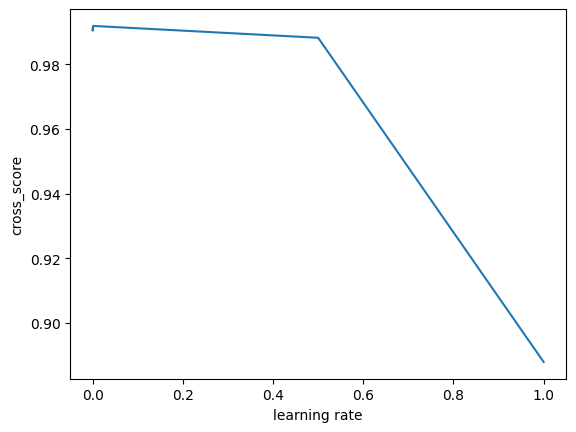

The best learning rate is:  0.001
Running time is:  0:01:05.916390


In [83]:
start = datetime.datetime.now()
score5_pair2 = []
#hidden_layer number ;
# can also tune the number of neurons on each layer
# the activation function
# the learning rate
lr_list = [1,0.5,0.001,1e-5,1e-8]
for i in lr_list:
    clf_pair2 = MLPClassifier(solver='adam', alpha = i,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
    cross_score5_pair2 = cross_val_score(clf_pair2, x_train3,y_train3,cv = 5).mean()
    score5_pair2.append(cross_score5_pair2)

lr_array = np.array(lr_list)
score5_array_pair2 = np.array(score5_pair2)
plt.plot(lr_array, score5_array_pair2)
plt.xlabel('learning rate')
plt.ylabel('cross_score')
plt.show()
max_index5_pair2 = score5_array_pair2.argmax()
best_lr_pair2 = lr_list[max_index5_pair2]
print('The best learning rate is: ', best_lr_pair2)
end = datetime.datetime.now()
print("Running time is: ",end-start)

In [ ]:
start = datetime.datetime.now()
ann_clf = MLPClassifier(solver='adam', alpha = best_lr_pair2,hidden_layer_sizes = (10,5,2), random_state=1,max_iter = 800)
ann_clf.fit(x_val3,y_val3)
y_predict = ann_clf.predict(x_val3)
print(accuracy_score(y_val3,y_predict))
end = datetime.datetime.now()
print("Running time is: ",end-start)

0.9407894736842105
Running time is:  0:00:00.406181


d:\download\python3.8\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
